In [44]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import sys

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))
from data_cleaning.data_cleaner import DataCleaner

print(tf.__version__)


2.16.2


# Linear Regression for Sea Level 1

**inputs**: Year, Country, Sea level rise, Average rainfall  
**output**: Average temperature

In [45]:
# Current working directory
current_directory = os.getcwd()

# Go up one directory to the root
root = os.path.abspath(os.path.join(current_directory, ".."))

# Get the path to the data
data_path = os.path.join(root, 'clean-data/processed_Sea_level_1_data.csv')

dc: DataCleaner = DataCleaner(data_path)
dc.preview(10)


,Year,Country,Avg Temperature (°C),Sea Level Rise (mm),Rainfall (mm)
0,2000,USA,15.440000,2.680000,1762.600000
1,2001,USA,24.500000,3.600000,2041.000000
2,2002,USA,12.066667,3.200000,1936.333333
3,2003,USA,15.950000,2.150000,2140.833333
4,2004,USA,22.000000,2.266667,1784.000000
5,2005,USA,27.100000,2.500000,622.000000
6,2006,USA,24.540000,2.700000,2067.600000
7,2007,USA,20.166667,3.766667,1760.666667
8,2008,USA,19.500000,2.500000,1419.000000
9,2009,USA,10.625000,3.400000,1617.000000


In [ ]:
# Extract features and target
# Since we only have USA, Country isn't a really feature we need to take into account
X = dc.df[["Year", "Sea Level Rise (mm)", "Rainfall (mm)"]].values
Y = dc.df["Avg Temperature (°C)"].values.reshape(-1, 1)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [47]:
# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_dim=X.shape[1], activation='linear')  # Linear Regression, dense adds bias term
])


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [49]:
# Train the model
history = model.fit(X_train, Y_train, epochs=100, batch_size=5, validation_split=0.2, verbose=1)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - loss: 221746.2500 - val_loss: 304784.4375
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 280631.2500 - val_loss: 303165.9688
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 243927.5000 - val_loss: 301245.0938
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 304062.0312 - val_loss: 299341.5625
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 309436.5938 - val_loss: 297249.3125
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 302330.3125 - val_loss: 295224.8125
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 331071.7500 - val_loss: 293029.8438
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 331545.9062 - val_loss: 291265.9375
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 211861.2500 - val_loss: 290010.2500
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 189966.9062 - val_loss: 288927.1250
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 

In [50]:
# Evaluate the model on the test data
test_loss = model.evaluate(X_test, Y_test)
print(f"Test Loss (MSE): {test_loss}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 147250.9062
Test Loss (MSE): 147250.90625


In [51]:
# Predict on the test set
Y_pred = model.predict(X_test)
print(Y_pred)
print(Y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
[[ -38.103027]
 [ 718.0727  ]
 [ 310.30603 ]
 [-313.12134 ]
 [-138.401   ]]
[[15.44      ]
 [ 5.5       ]
 [19.5       ]
 [24.5       ]
 [26.13333333]]


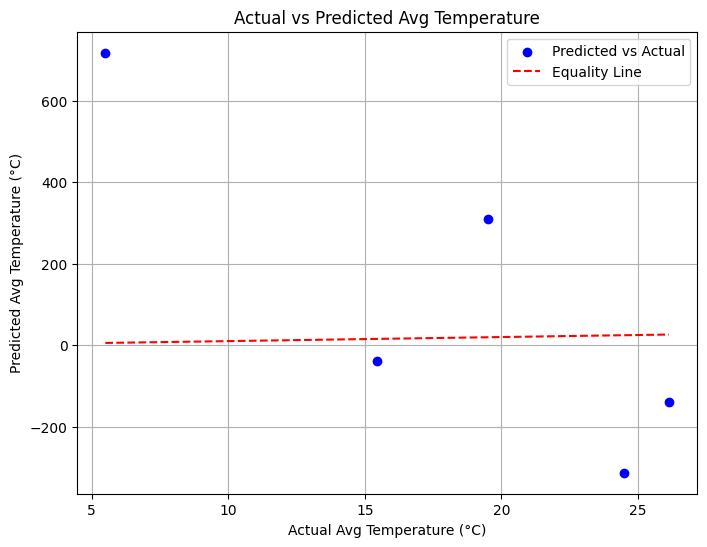

In [52]:
# Plotting Actual vs Predicted with a line of equality
plt.figure(figsize=(8, 6))

# Scatter plot
plt.scatter(Y_test, Y_pred, label='Predicted vs Actual', color='blue')

# Line of equality
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--', label='Equality Line')

# Labels and title
plt.xlabel('Actual Avg Temperature (°C)')
plt.ylabel('Predicted Avg Temperature (°C)')
plt.title('Actual vs Predicted Avg Temperature')

# Grid and legend
plt.grid(True)
plt.legend()

# Show plot
plt.show()